In [1]:
!pip install numpy matplotlib scikit-learn


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans

In [7]:
# Overlapping + uneven clusters
X1, _ = make_blobs(n_samples=50, centers=[[0,0]], cluster_std=0.5)
X2, _ = make_blobs(n_samples=50, centers=[[1.5,0]], cluster_std=0.5)   # overlapping with X1
X3, _ = make_blobs(n_samples=50, centers=[[5,0]], cluster_std=2.0)     # very spread out
outliers = np.array([[3,3], [4,-4], [0,5]])

X = np.vstack([X1, X2, X3, outliers])
print(X)

[[ 4.01053235e-02 -1.94897744e-01]
 [-5.38783272e-01  3.90635191e-01]
 [ 4.63813099e-01  9.52813778e-01]
 [ 5.96364873e-01  9.20960458e-01]
 [-1.51000379e-02 -3.79481274e-01]
 [ 3.53606816e-01 -1.40443203e+00]
 [-7.73444877e-02 -7.60036137e-04]
 [ 1.22779976e-01 -7.05698913e-02]
 [-3.03002316e-01  1.59634999e-01]
 [-1.45565734e+00  2.45931005e-01]
 [-1.37184620e-01  9.47071345e-02]
 [ 6.84351430e-03  4.41621310e-01]
 [ 5.51250527e-01  2.11537473e-01]
 [-2.19480618e-02  8.39885168e-02]
 [ 6.93226521e-02  1.15706399e+00]
 [-7.31844180e-01  1.04711690e-01]
 [-9.60721011e-02 -2.51660299e-01]
 [-4.39468814e-01 -3.16545749e-01]
 [ 2.42336322e-03 -1.12455769e+00]
 [-5.66983031e-01 -2.88210801e-02]
 [ 4.86799923e-01 -1.44251760e-02]
 [ 7.59591399e-01  2.70452549e-01]
 [ 7.14833168e-01 -5.65747688e-02]
 [ 2.65566792e-01 -1.17622874e+00]
 [ 2.05170590e-01  5.44768781e-01]
 [ 1.38548699e+00 -3.11265776e-01]
 [ 6.29276263e-01 -8.71481958e-01]
 [-5.44439856e-01 -6.76906091e-02]
 [-5.39752611e-01  1

In [8]:
def plot_clusters(X, labels, centers, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()

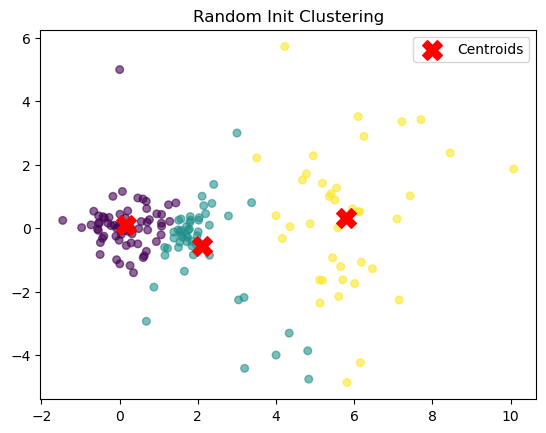

In [9]:
#random init: kmeans
np.random.seed(42)
random_idx = np.random.choice(len(X), 3, replace=False)
random_centers = X[random_idx]

kmeans_random = KMeans(n_clusters=3, init=random_centers, n_init=1, max_iter=100, random_state=42)
kmeans_random.fit(X)
plot_clusters(X, kmeans_random.labels_, kmeans_random.cluster_centers_, "Random Init Clustering")

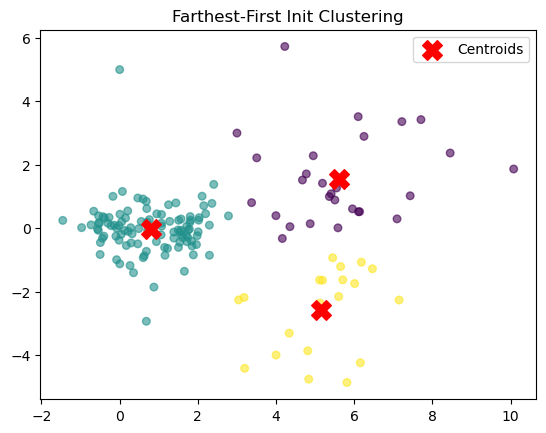

In [11]:
#farthest traveral first
first_idx = np.random.choice(len(X))
centers_ff = [X[first_idx]]

for _ in range(2):  # need 3 centers total
    dist = np.array([min(np.linalg.norm(x - c) for c in centers_ff) for x in X])
    next_center = X[np.argmax(dist)]
    centers_ff.append(next_center)

centers_ff = np.array(centers_ff)
kmeans_ff = KMeans(n_clusters=3, init=centers_ff, n_init=1, max_iter=100, random_state=42)
kmeans_ff.fit(X)
plot_clusters(X, kmeans_ff.labels_, kmeans_ff.cluster_centers_, "Farthest-First Init Clustering")

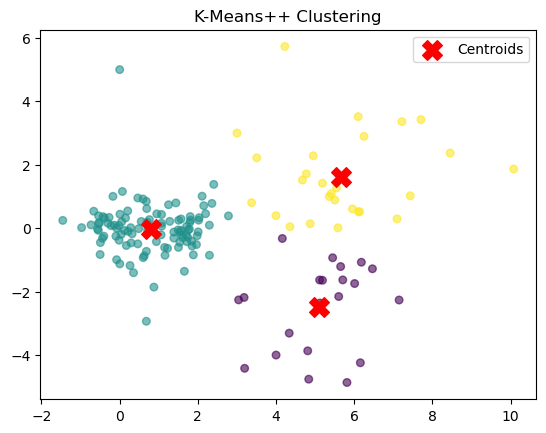

In [18]:
# k++

kmeans_pp=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans_pp.fit(X)

plot_clusters(X, kmeans_pp.labels_, kmeans_pp.cluster_centers_, "K-Means++ Clustering")

In [19]:
print("WCSS Comparison:")
print(f"Random Init:       {kmeans_random.inertia_:.2f}")
print(f"Farthest-First:    {kmeans_ff.inertia_:.2f}")
print(f"K-Means++:         {kmeans_pp.inertia_:.2f}")


WCSS Comparison:
Random Init:       457.09
Farthest-First:    338.32
K-Means++:         338.31
